# README

Notebook used to plot images

In [2]:
import pickle

with open("/data/RMN/dataset-gliomi-cnn/slices-full-brain/COSTANZI_P/slices-T1-224.pickle", "rb") as file:
    cube = pickle.load(file)

In [12]:
import nibabel

In [13]:
m = nibabel.load("/data/RMN/dataset-gliomi/scaled/COSTANZI_P/T1scalatamedia.nii")

In [14]:
m.shape

(512, 512, 352)

In [5]:
from gliomi import *

In [5]:
cube.shape

(224, 224, 352)

In [1]:
import keras

Using TensorFlow backend.


In [2]:
keras.__version__

'2.3.1'

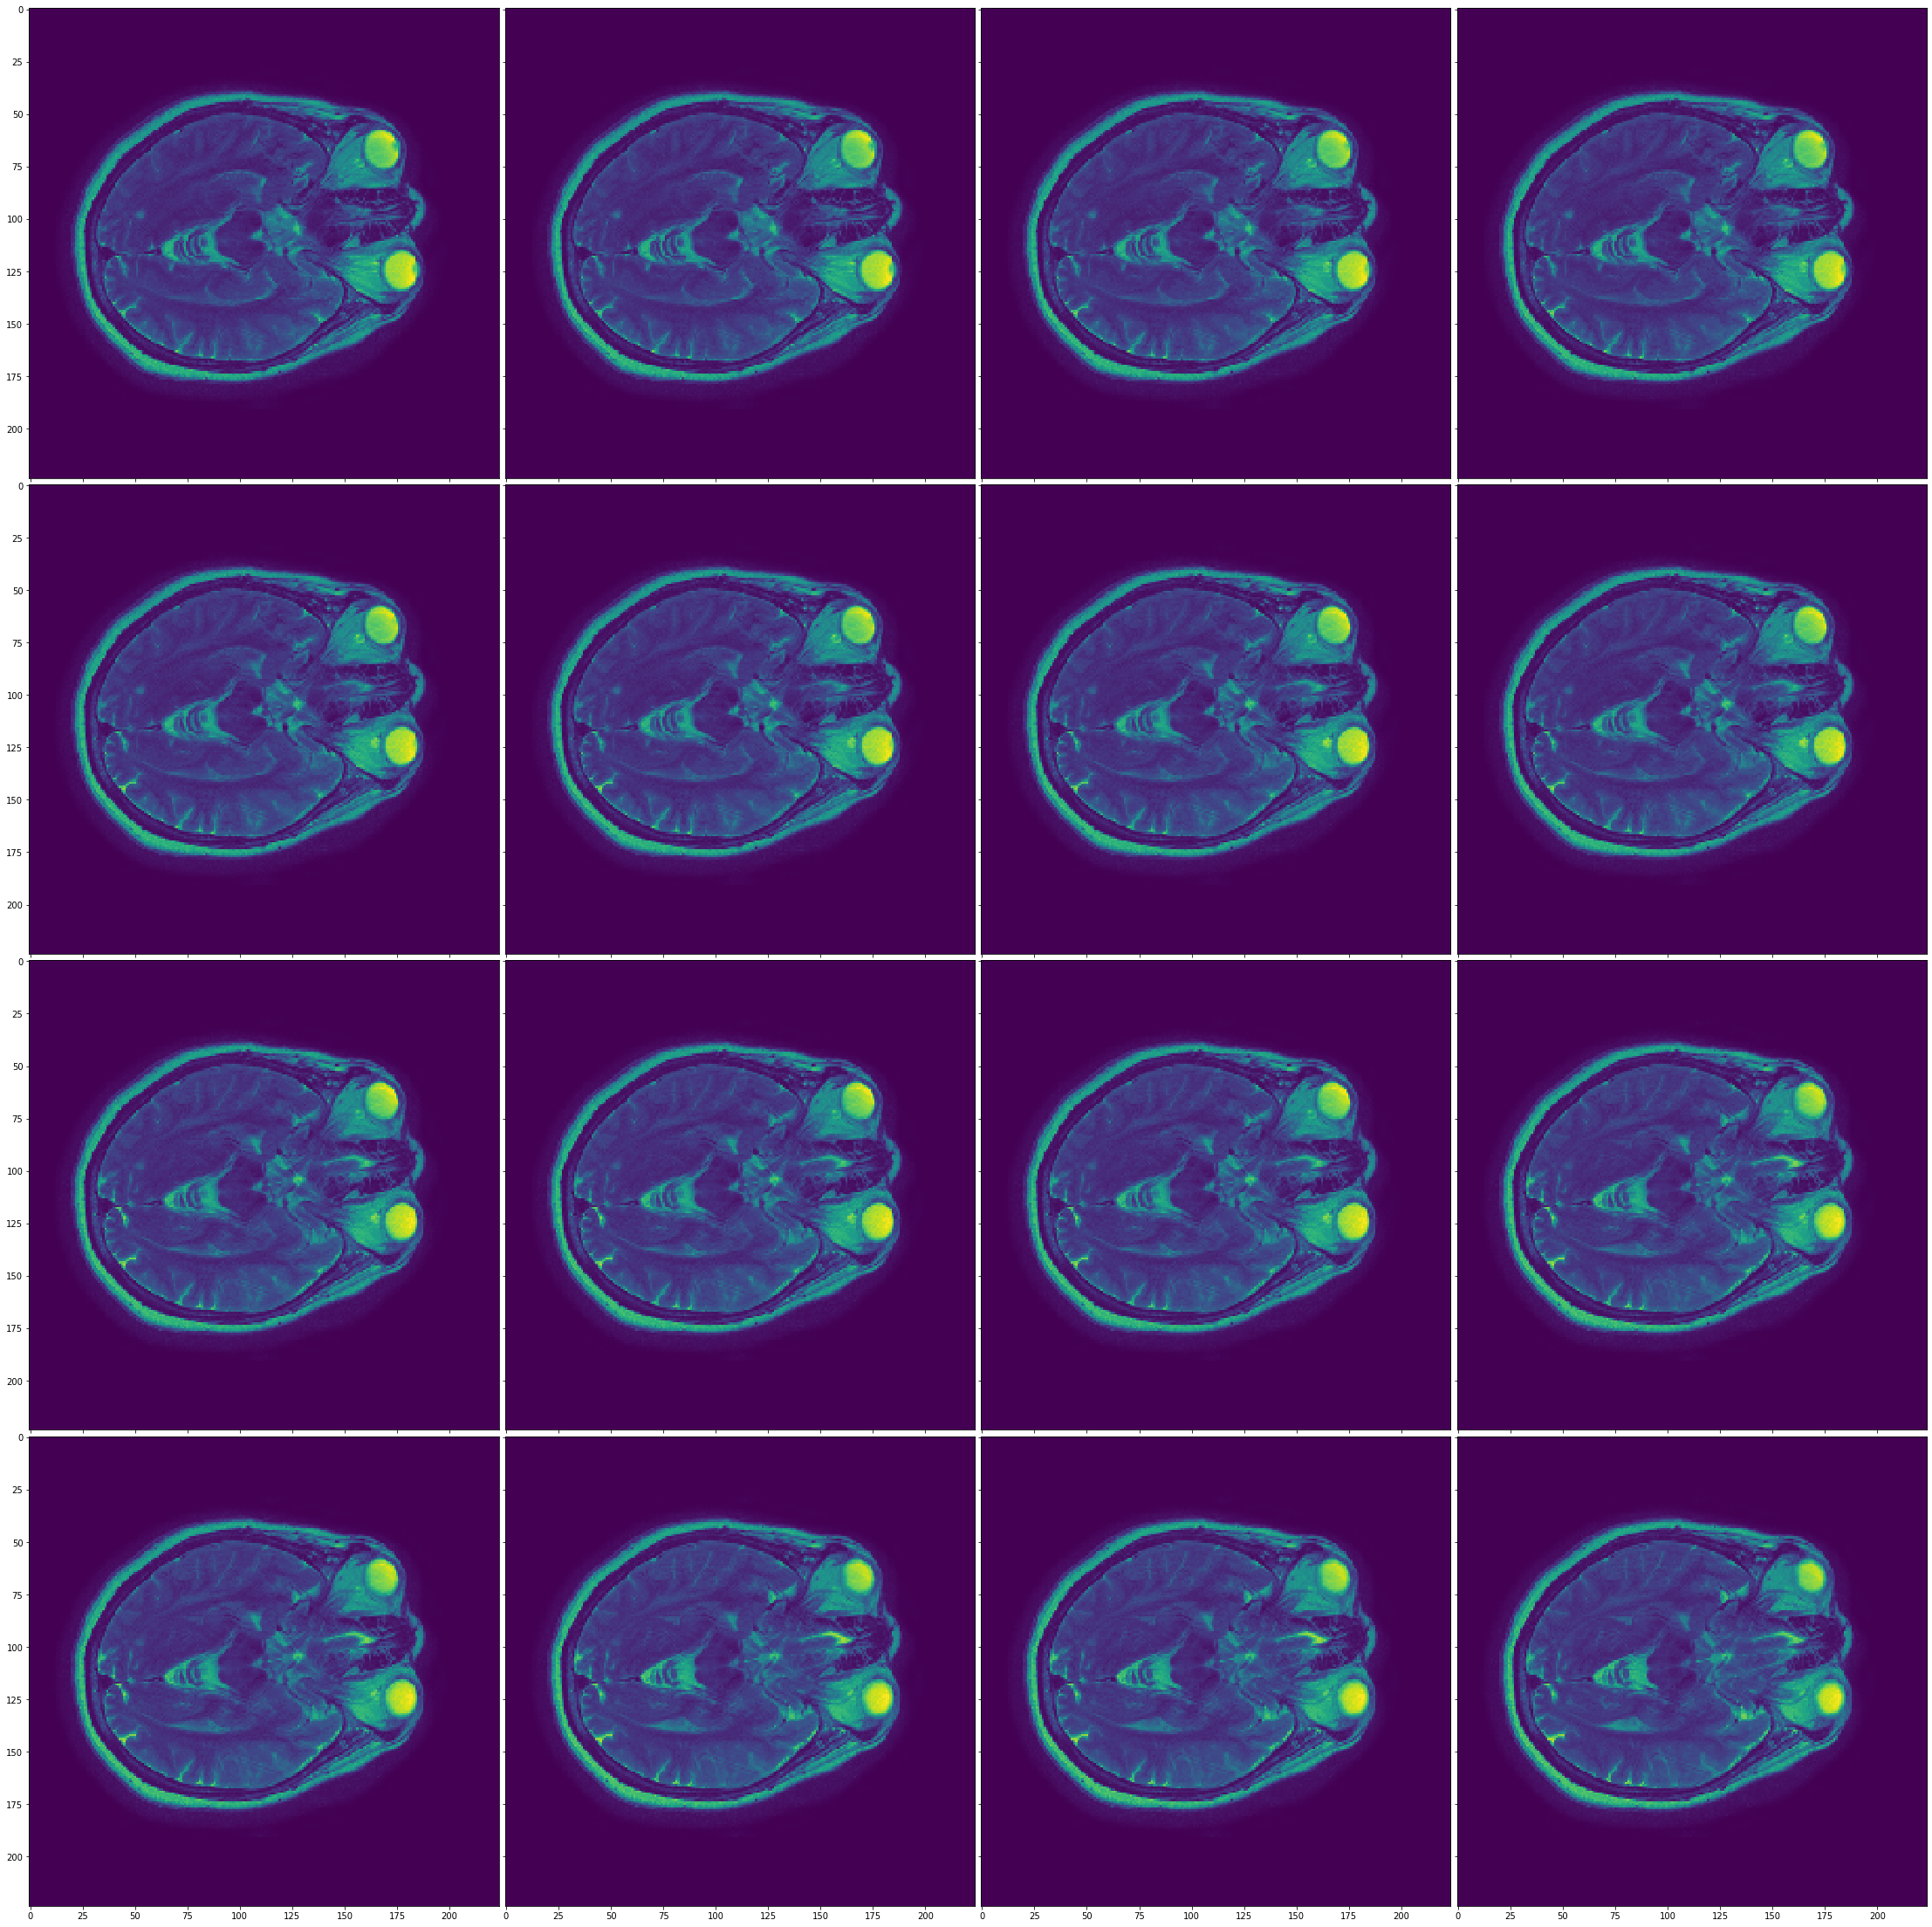

In [15]:
# Plot a grid of above 70% masked data (data + mask)

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(figsize=(40., 40.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )


for ax, im in zip(grid, [cube[:,:,i] for i in range(16)]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    # ax.imshow(im_roi, alpha=0.5)

plt.show()

# Plot Brain and Mask

In [19]:
np.sum(get_roi_size(roi, axis=2) > 0)

159

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
from nilearn.image import resample_to_img

subjects_dir = "/data/RMN/dataset-gliomi"

subject = "IONTA_LUCIANA"

sequence_repo = SequenceRepoGliomi(subjects_dir)

t1 = sequence_repo.get_sequence(subject, "T1")

print(t1.shape)

roi = sequence_repo.get_roi(subject, "T2ROI")

print(roi.shape)

roi_resampled = resample_to_img(roi, t1, interpolation='nearest')

print(roi_resampled.shape)

img = t1.dataobj

img_roi = roi_resampled.dataobj

fig = plt.figure(figsize=(40., 40.))

grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5, 5),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

((rmin, rmax), (cmin, cmax), (zmin, zmax)) = get_bounding_box(roi_resampled)

zcenter = int((zmax - zmin) / 2) + zmin

indexes = list(range(zcenter - 13, zcenter + 13))

for ax, im, im_roi in zip(grid, [img[:,:,z_slice] for z_slice in indexes], [img_roi[:,:,z_slice] for z_slice in indexes]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    ax.imshow(im_roi, alpha=0.2)

plt.show()

NameError: name 'SequenceRepoGliomi' is not defined

# Plot Slice survivor = 0

In [2]:
import pickle

with open("/data/RMN/dataset-gliomi-cnn/2-datasets-full-brain/dataset-mgmt-adc-224-100-perc.pickle", "rb") as file:
    X, y = pickle.load(file)

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
from nilearn.image import resample_to_img

sequence_repo = SequenceRepoGliomi(subjects_dir)

for subject in X.keys():
    
    max_slice = X[subject][0]
    
    t1 = sequence_repo.get_sequence(subject, "T1")

    roi = sequence_repo.get_roi(subject, "T2ROI")

    roi_resampled = resample_to_img(roi, t1, interpolation='nearest')


    
    
    
    
    
img = t1.dataobj

img_roi = roi_resampled.dataobj

fig = plt.figure(figsize=(40., 40.))

grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5, 5),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

((rmin, rmax), (cmin, cmax), (zmin, zmax)) = get_bounding_box(roi_resampled)

zcenter = int((zmax - zmin) / 2) + zmin

indexes = list(range(zcenter - 13, zcenter + 13))

for ax, im, im_roi in zip(grid, [img[:,:,z_slice] for z_slice in indexes], [img_roi[:,:,z_slice] for z_slice in indexes]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    ax.imshow(im_roi, alpha=0.2)

plt.show()

NameError: name 'subjects_dir' is not defined